# 1. EXPLORATORY DATA ANALYSIS

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Set default Seaborn style

In [2]:
sns.set(style="whitegrid")

Load the training and test datasets

In [3]:
train_data_path = '../data/CMaps/train_FD001.txt'
test_data_path = '../data/CMaps/test_FD001.txt'
rul_data_path = '../data/CMaps/RUL_FD001.txt'

Define column names based on the dataset's structure

In [4]:
col_names = [
    'engine_id', 'time_in_cycles', 
    'operational_setting_1', 'operational_setting_2', 'operational_setting_3'
] + [f'sensor_{i}' for i in range(1, 27)]  # This creates sensor_1 to sensor_21

Load the train and test datasets

In [5]:
train_df = pd.read_csv(train_data_path, sep=' ', header=None, names=col_names)
test_df = pd.read_csv(test_data_path, sep=' ', header=None, names=col_names)

Checking the shape of dataframes

In [6]:
print("The shape of the train dataframe is: ", train_df.shape)
print("The shape of the test dataframe is: ", train_df.shape)

The shape of the train dataframe is:  (20631, 31)
The shape of the test dataframe is:  (20631, 31)


Drop columns that are completely empty (if any)

In [7]:
train_df.dropna(axis=1, how='all', inplace=True)
test_df.dropna(axis=1, how='all', inplace=True)

Checking if shape has changed

In [8]:
print("The shape of the train dataframe is: ", train_df.shape)
print("The shape of the test dataframe is: ", train_df.shape)

The shape of the train dataframe is:  (20631, 26)
The shape of the test dataframe is:  (20631, 26)


Load the Remaining Useful Life (RUL) data for the test set

In [9]:
rul_df = pd.read_csv(rul_data_path, header=None, names=['RUL'])

Checking the data

In [10]:
rul_df.head()

,RUL
0,112
1,98
2,69
3,82
4,91


Add RUL values to the test dataframe
Since the RUL values correspond to each engine in the test set, we add them directly to the test_df

In [11]:
test_df['RUL'] = test_df['engine_id'].map(lambda x: rul_df.loc[x - 1, 'RUL'])

Now, for each engine, the RUL value is the same for all cycles but corresponds to the final cycle for that engine.
Let's verify the first few rows


In [12]:
test_df[['engine_id', 'time_in_cycles', 'RUL']].head()

,engine_id,time_in_cycles,RUL
0,1,1,112
1,1,2,112
2,1,3,112
3,1,4,112
4,1,5,112


In [13]:
test_df[['engine_id', 'time_in_cycles', 'RUL']].tail()

,engine_id,time_in_cycles,RUL
13091,100,194,20
13092,100,195,20
13093,100,196,20
13094,100,197,20
13095,100,198,20


Each cycle for an engine will have the same RUL value that corresponds to the remaining cycles for that engine, starting from the last recorded cycle in the test data.

Check summary statistics of the training data

In [14]:
train_df.describe()

,engine_id,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


Check for missing values in the training and test data


In [15]:
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

print("Missing values in training data:")
print(train_missing[train_missing > 0])

print("\nMissing values in test data:")
print(test_missing[test_missing > 0])

Missing values in training data:
Series([], dtype: int64)

Missing values in test data:
Series([], dtype: int64)


Investigate outliers using boxplots for sensor data

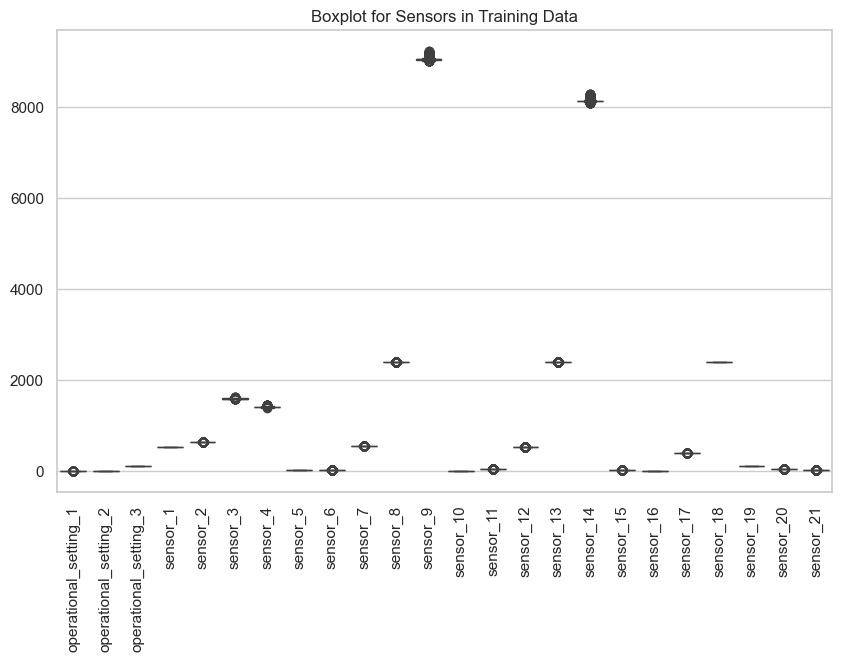

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df.iloc[:, 2:])  # Skip 'engine_id' and 'time_in_cycles' columns
plt.xticks(rotation=90)
plt.title("Boxplot for Sensors in Training Data")
plt.show()

Investigate the distributions of sensor readings (e.g., 'sensor_2')

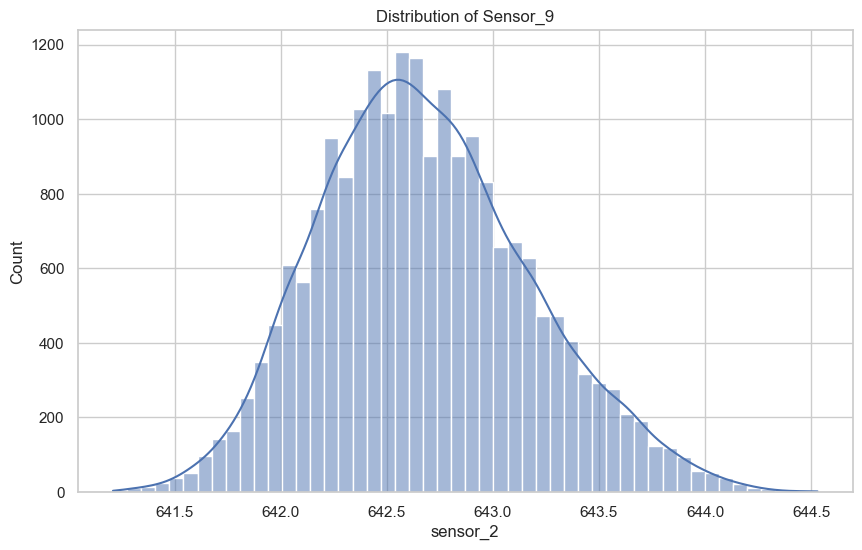

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['sensor_2'], kde=True, bins=50)
plt.title("Distribution of Sensor_9")
plt.show()

Check the correlation between RUL and selected sensor features (e.g., sensor_1, sensor_2)

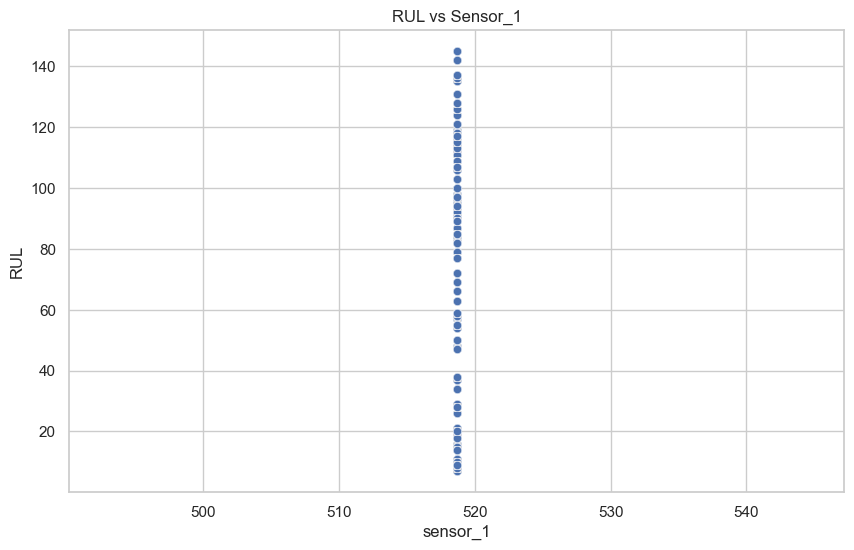

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_df, x='sensor_1', y='RUL', alpha=0.6)
plt.title("RUL vs Sensor_1")
plt.show()

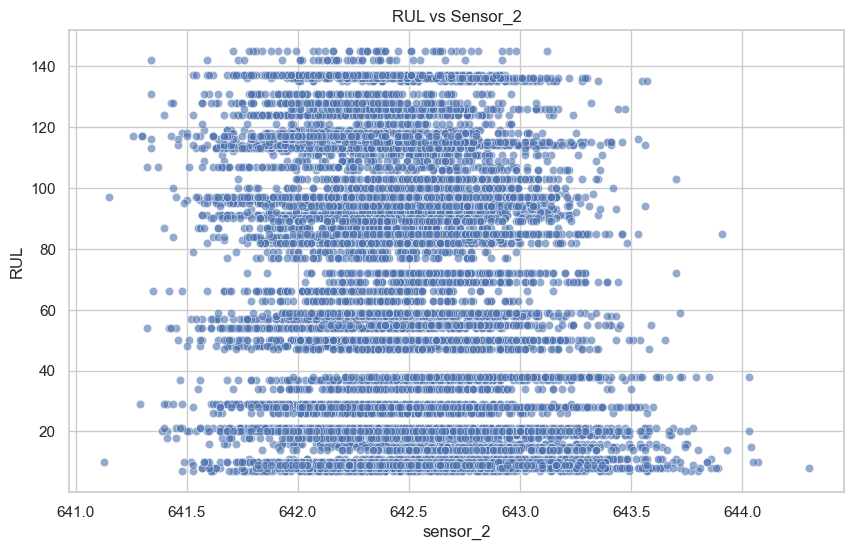

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_df, x='sensor_2', y='RUL', alpha=0.6)
plt.title("RUL vs Sensor_2")
plt.show()

Pairplot to visualize relationships between a subset of sensors and RUL

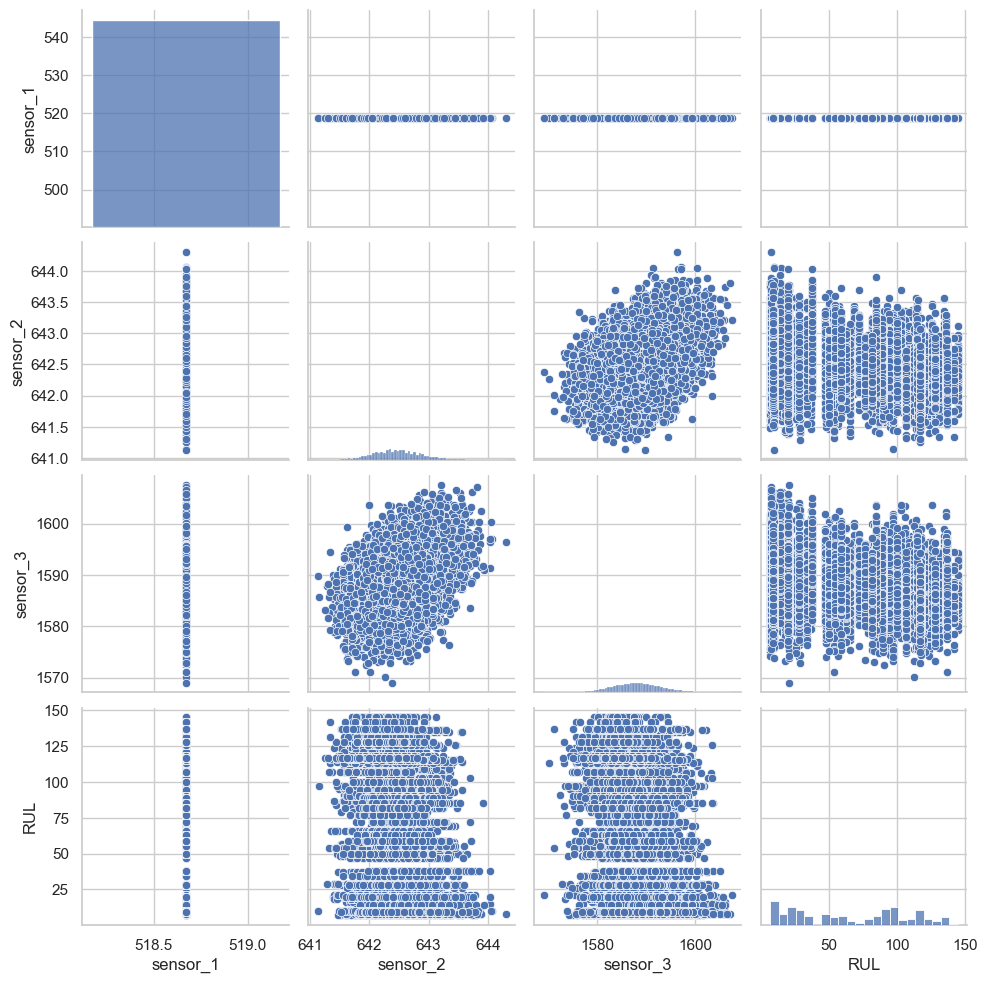

In [20]:
sns.pairplot(test_df[['sensor_1', 'sensor_2', 'sensor_3', 'RUL']])
plt.show()

Investigate the trend of sensor readings over time for a single engine

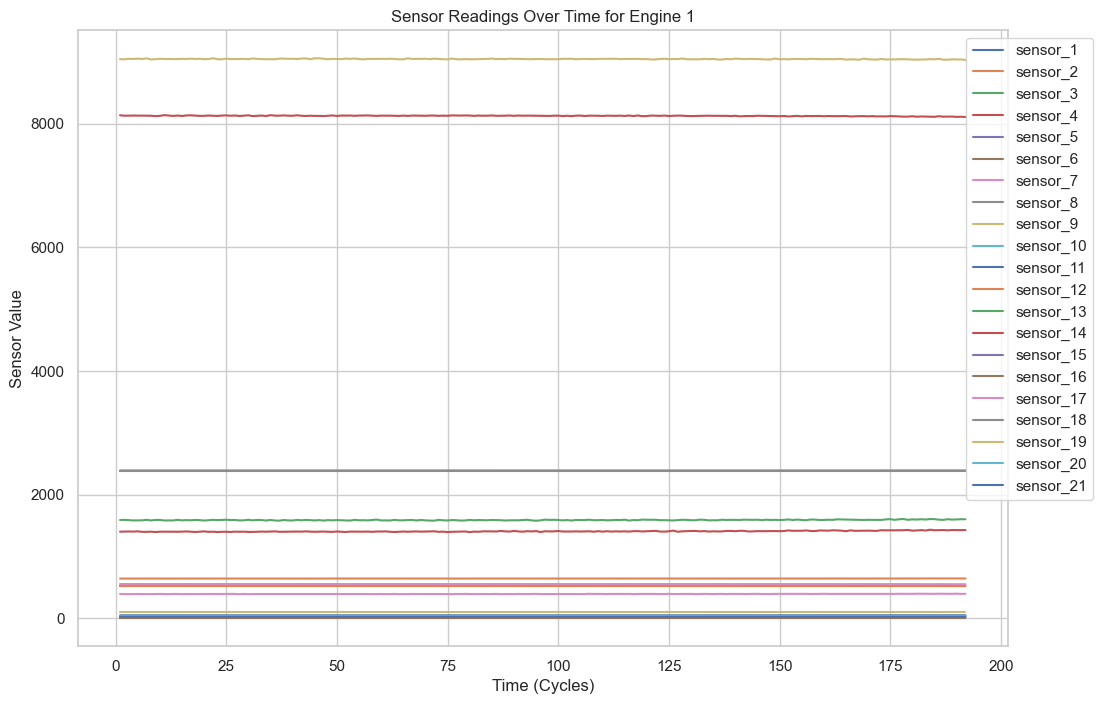

In [21]:
engine_id = 1  # Change the engine_id for different engines
engine_data = train_df[train_df['engine_id'] == engine_id]
plt.figure(figsize=(12, 8))
for sensor in [f'sensor_{i}' for i in range(1, 22)]:
    plt.plot(engine_data['time_in_cycles'], engine_data[sensor], label=sensor)
plt.title(f"Sensor Readings Over Time for Engine {engine_id}")
plt.xlabel("Time (Cycles)")
plt.ylabel("Sensor Value")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

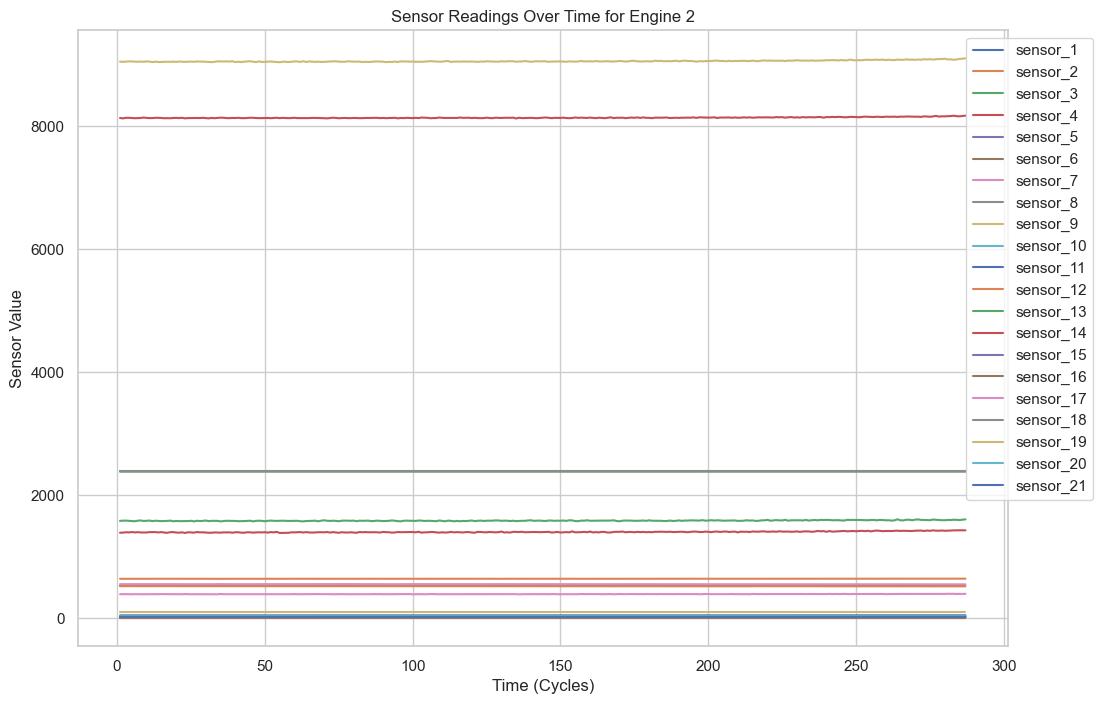

In [22]:
engine_id = 2  # Change the engine_id for different engines
engine_data = train_df[train_df['engine_id'] == engine_id]
plt.figure(figsize=(12, 8))
for sensor in [f'sensor_{i}' for i in range(1, 22)]:
    plt.plot(engine_data['time_in_cycles'], engine_data[sensor], label=sensor)
plt.title(f"Sensor Readings Over Time for Engine {engine_id}")
plt.xlabel("Time (Cycles)")
plt.ylabel("Sensor Value")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

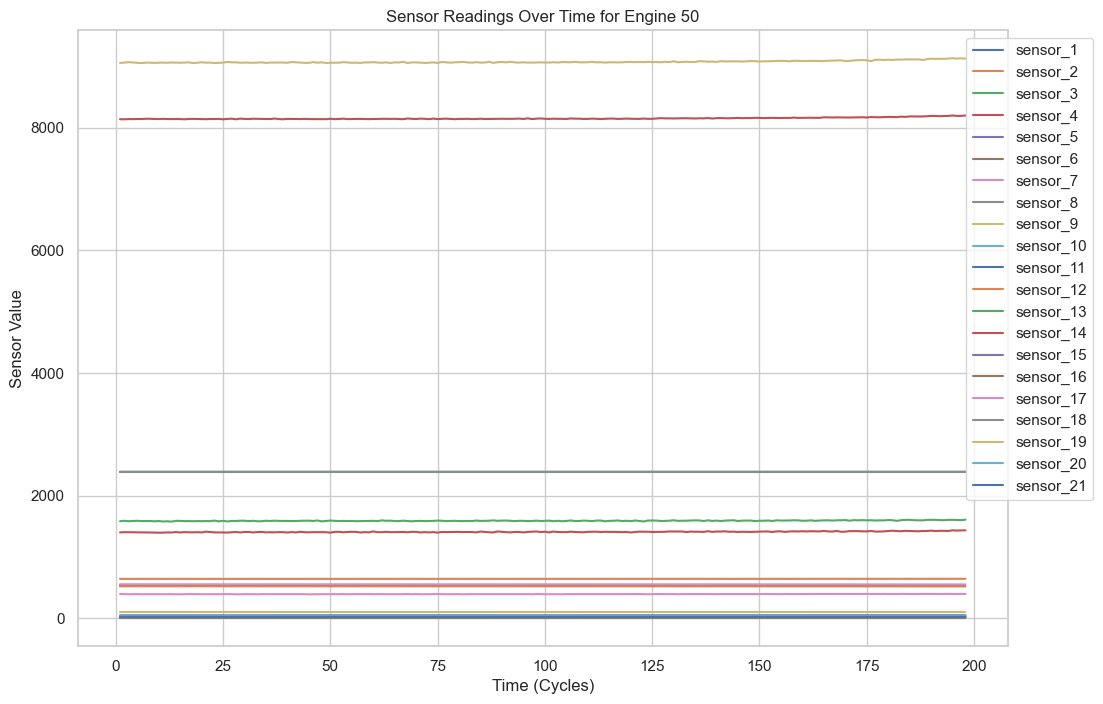

In [23]:
engine_id = 50  # Change the engine_id for different engines
engine_data = train_df[train_df['engine_id'] == engine_id]
plt.figure(figsize=(12, 8))
for sensor in [f'sensor_{i}' for i in range(1, 22)]:
    plt.plot(engine_data['time_in_cycles'], engine_data[sensor], label=sensor)
plt.title(f"Sensor Readings Over Time for Engine {engine_id}")
plt.xlabel("Time (Cycles)")
plt.ylabel("Sensor Value")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()